# <u><b>Diamond Dataset</u></b>:
- Diamond Dataset : This classic dataset contains the prices and other attributes of almost
54,000 diamonds.
- Features :
  
  + price: price in US dollars (\$326--\$18,823)
  + carat: weight of the diamond (0.2--5.01)
  + cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
  + color: diamond color, from J (worst) to D (best)
  + clarity: a measurement of how clear the diamond is (I1 (worst), SI2,
  SI1, VS2, VS1, VVS2, VVS1, IF (best))
  + x: length in mm (0--10.74)
  + y: width in mm (0--58.9)
  + z: depth in mm (0--31.8)
  + depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
  + table: width of top of diamond relative to widest point (43--95)

## Steps to performed on the given dataset :
  - Imported the required Libraries
  - Loaded Diamond dataset
  - Target variable taken is Price.
  - Applied Data Preprocessing techniques
  - Split the data
  - Applied MinMax Scaling technique

## Import Libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns

## Dataset Loading



In [2]:
# Upload file to Local Drive :

from google.colab import files
uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['diamonds.csv']))  # Dataset is now stored in a Pandas Dataframe

In [4]:
display(df)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Data Preprocessing

In [ ]:
# To know the details of the DataFrame and datatype of every column :

df.info()                # raw data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


From above information obtained from the Diamonds data frame, it can be observed that :
* There are total 53940 rows and 11 columns.
* Moreover, Null values are not present in any columns

## Data cleaning

In [ ]:
# Drop the Unnamed column

df.drop(columns = 'Unnamed: 0',inplace = True)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# To check null values count (if present) in each column :

df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
# Checking for duplicate records :

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool

<b>Duplicated() :</b> By default, for each set of duplicated values, the first occurrence is set on False and all others on True.

In [ ]:
# Count of Duplicate Records in the Entire Dataset :

df.duplicated().sum()

146

A sum operation on the results obtained from the duplicated() function will give us the total number of duplicate values.
- As displayed above, our dataframe has 146 Duplicates.

In [ ]:
# Drop duplicates, if any
df.drop_duplicates(inplace=True)

In [ ]:
df.info()    # Cleaned data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
# To calculate the mean, standard deviation, percentiles and other basic statistics:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53794.0,0.797780,0.473390,0.2,0.40,0.70,1.04,5.01
depth,53794.0,61.748080,1.429909,43.0,61.00,61.80,62.50,79.00
table,53794.0,57.458109,2.233679,43.0,56.00,57.00,59.00,95.00
price,53794.0,3933.065082,3988.114460,326.0,951.00,2401.00,5326.75,18823.00
x,53794.0,5.731214,1.120695,0.0,4.71,5.70,6.54,10.74
y,53794.0,5.734653,1.141209,0.0,4.72,5.71,6.54,58.90
z,53794.0,3.538714,0.705037,0.0,2.91,3.53,4.03,31.80


In [5]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [9]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Splitting the data

In [6]:
Y = df['price']
X = df.drop(columns = 'price')

## Split the data into training data and test data using sklearn's train-test-split

In [7]:
import sklearn
from sklearn.model_selection import train_test_split

In [8]:
X_conti = X[['carat','depth','table','x','y','z']]
X_catg = X[['cut','color','clarity']]

In [23]:
X_contiTrain,X_contiTest,X_catgTrain,X_catgTest,Y_Train,Y_Test = train_test_split(X_conti , X_catg , Y,
                                                                              test_size = 0.20,
                                                                              random_state = 20)

In [24]:
display(X_contiTrain.shape,X_contiTest.shape,X_catgTrain.shape,X_catgTest.shape,len(Y_Train),len(Y_Test))


(43152, 6)

(10788, 6)

(43152, 3)

(10788, 3)

43152

10788

In [25]:
X_contiTrain

,carat,depth,table,x,y,z
22901,1.50,61.9,60.0,7.26,7.21,4.48
19630,1.03,62.0,56.0,6.50,6.54,4.04
27324,2.43,62.3,59.0,8.54,8.61,5.34
2109,1.08,61.7,59.0,6.54,6.59,4.05
28617,0.30,61.3,60.0,4.28,4.24,2.61
...,...,...,...,...,...,...
23452,1.50,60.7,62.0,7.30,7.33,4.44
23775,1.51,61.9,57.0,7.35,7.42,4.57
37135,0.42,60.9,56.0,4.87,4.89,2.97
27098,2.05,59.7,59.0,8.39,8.27,4.97


### Copy the arrays


In [26]:
beforeNormTrain = X_contiTrain.copy()
beforeNormTest = X_contiTest.copy()

## Applying Normalization technique - MinMax Scaler

In [27]:
from sklearn.preprocessing import MinMaxScaler
normScaler = MinMaxScaler()
normScaler.fit_transform(X_contiTrain)

array([[0.27027027, 0.53693182, 0.32692308, 0.67597765, 0.12241087,
        0.1408805 ],
       [0.17255717, 0.53977273, 0.25      , 0.60521415, 0.11103565,
        0.12704403],
       [0.46361746, 0.54829545, 0.30769231, 0.79515829, 0.14617997,
        0.16792453],
       ...,
       [0.04573805, 0.50852273, 0.25      , 0.45344507, 0.08302207,
        0.09339623],
       [0.38461538, 0.47443182, 0.30769231, 0.78119181, 0.14040747,
        0.15628931],
       [0.07276507, 0.51420455, 0.26923077, 0.4981378 , 0.0893039 ,
        0.10188679]])

### Converting above 2D array into a Dataframe

In [28]:
X_conti_NormTrain = pd.DataFrame(normScaler.fit_transform(X_contiTrain),
                                columns = X_contiTrain.columns,
                                index = X_contiTrain.index)

X_conti_NormTrain

,carat,depth,table,x,y,z
22901,0.270270,0.536932,0.326923,0.675978,0.122411,0.140881
19630,0.172557,0.539773,0.250000,0.605214,0.111036,0.127044
27324,0.463617,0.548295,0.307692,0.795158,0.146180,0.167925
2109,0.182952,0.531250,0.307692,0.608939,0.111885,0.127358
28617,0.020790,0.519886,0.326923,0.398510,0.071986,0.082075
...,...,...,...,...,...,...
23452,0.270270,0.502841,0.365385,0.679702,0.124448,0.139623
23775,0.272349,0.536932,0.269231,0.684358,0.125976,0.143711
37135,0.045738,0.508523,0.250000,0.453445,0.083022,0.093396
27098,0.384615,0.474432,0.307692,0.781192,0.140407,0.156289


In [29]:
X_conti_NormTest = pd.DataFrame(normScaler.fit_transform(X_contiTest),
                                columns = X_contiTest.columns,
                                index = X_contiTest.index)

X_conti_NormTest

,carat,depth,table,x,y,z
20244,0.380403,0.530556,0.695652,0.587276,0.562806,0.734095
45013,0.097983,0.527778,0.347826,0.241436,0.244698,0.525285
53351,0.144092,0.527778,0.434783,0.321370,0.311582,0.570962
47212,0.112392,0.533333,0.347826,0.264274,0.278956,0.544861
1460,0.190202,0.522222,0.347826,0.389886,0.402936,0.618271
...,...,...,...,...,...,...
36499,0.048991,0.463889,0.478261,0.161501,0.159869,0.456770
26632,0.377522,0.472222,0.434783,0.597064,0.610114,0.724307
31660,0.051873,0.513889,0.191304,0.150082,0.166395,0.469821
15121,0.262248,0.500000,0.304348,0.481240,0.495922,0.667210


## Comparing the array's distribution 'before scaling' and 'after scaling' using Histrogram and KDE plot


<Axes: ylabel='Count'>

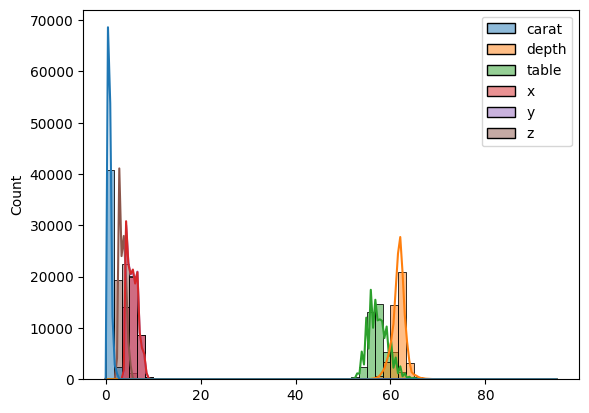

In [30]:
sns.histplot(beforeNormTrain,kde = True)

<Axes: ylabel='Count'>

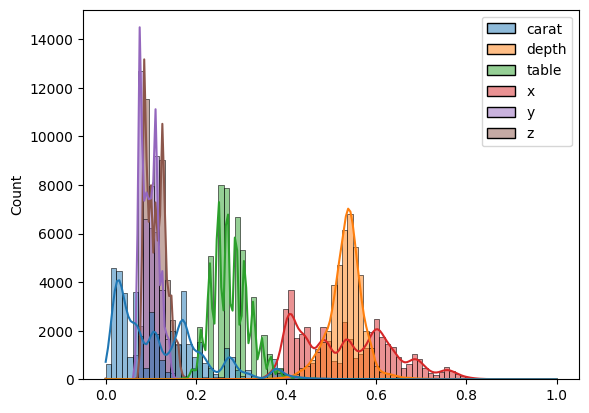

In [31]:
sns.histplot(X_conti_NormTrain,kde = True)

## Conclusion

+ From the above plots, we can observe that there is no change in the distribution. Only scaling changed.